# Exploratory Data Analysis: Global Terrorism
© The Sparks Foundation



### Overview: Exploratory Data Analysis (EDA) of Global Terrorism

Introduction:<br>
The EDA project on global terrorism aims to analyze a comprehensive dataset containing information about terrorist incidents worldwide. By conducting an in-depth exploration of the data, we seek to gain insights into patterns, trends, and underlying factors related to global terrorism. The project aims to provide a deeper understanding of the nature and characteristics of terrorist incidents, identify hotspots, analyze the impact of counterterrorism efforts, and derive actionable insights to enhance counterterrorism strategies and policies.

Objectives:
1. Understand the frequency and trends of terrorist incidents: Analyze the number of incidents over time, identify patterns, and uncover any notable changes or trends in terrorism activities.
2. Explore geographical distribution: Investigate the distribution of terrorist incidents across countries and regions, identify high-risk areas, and visualize the spatial patterns using heatmaps or choropleth maps.
3. Examine attack types and tactics: Break down the various types of attacks, such as bombings, armed assaults, or hijackings, and identify the most common weapons or tactics employed by terrorist groups.
4. Analyze target types: Investigate the specific types of targets that terrorists aim for, such as government entities, civilians, or critical infrastructure, to understand their motivations and priorities.
5. Study the demographics of attackers: Explore the demographic characteristics of terrorists, including age, gender, and nationality, to gain insights into the profiles of individuals involved in terrorism.
6. Assess the severity and impact of attacks: Analyze the number of casualties (fatalities, injuries) caused by terrorist incidents, evaluate the severity of attacks, and examine the economic impact, including property damage and economic loss.
7. Identify terrorist groups and affiliations: Identify and analyze the various terrorist groups or organizations involved in the incidents, examine affiliations and connections between different groups, and understand their activities and networks.
8. Evaluate counterterrorism strategies: Assess the effectiveness of counterterrorism strategies and policies, analyze their impact on the frequency and severity of incidents, and identify regions or countries with successful counterterrorism initiatives.

Methodology:<br>
The project will involve data preprocessing, exploratory data analysis using various statistical and visualization techniques, and deriving meaningful insights from the findings. Python programming language and libraries such as Pandas, Matplotlib, Seaborn, and Plotly will be used to manipulate and analyze the dataset, create visualizations, and perform statistical tests.

Expected Outcome:<br>
The EDA project on global terrorism aims to provide a comprehensive understanding of the phenomenon of terrorism worldwide. By uncovering patterns, trends, and factors associated with terrorist incidents, the project will contribute valuable insights that can inform policymakers, security agencies, and researchers in their efforts to combat terrorism. The findings may lead to the identification of effective counterterrorism strategies, improved security measures, and targeted interventions to mitigate the impact of terrorism globally.

## Importing of Libraries

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import folium
import networkx as nx
from scipy import stats

## Loading of Dataset

In [59]:
df = pd.read_csv('terror.csv', encoding='latin1', dtype={'column_name': str}, low_memory=False)

df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Exploratory Data Analysis (EDA)

In [60]:
df.shape

(181691, 135)

In [61]:
df['casuality'] = df['nkill'] + df['nwound']

In [62]:
for i in df.columns:
    print(i, end=',')

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

In [63]:
df2 = df[['iyear','imonth', 'iday', 'country_txt', 'region_txt', 'city', 'longitude', 'latitude', 'attacktype1_txt', 'targtype1_txt', 'gname', 'motive', 'weaptype1_txt', 'nkill', 'nwound', 'addnotes', 'casuality', 'success', 'property', 'gname2', 'suicide']]

In [64]:
df2.head()

,iyear,imonth,iday,country_txt,region_txt,city,longitude,latitude,attacktype1_txt,targtype1_txt,...,motive,weaptype1_txt,nkill,nwound,addnotes,casuality,success,property,gname2,suicide
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,-69.951164,18.456792,Assassination,Private Citizens & Property,...,NaN,Unknown,1.0,0.0,NaN,1.0,1,0,NaN,0
1,1970,0,0,Mexico,North America,Mexico city,-99.086624,19.371887,Hostage Taking (Kidnapping),Government (Diplomatic),...,NaN,Unknown,0.0,0.0,NaN,0.0,1,0,NaN,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,120.599741,15.478598,Assassination,Journalists & Media,...,NaN,Unknown,1.0,0.0,NaN,1.0,1,0,NaN,0
3,1970,1,0,Greece,Western Europe,Athens,23.762728,37.997490,Bombing/Explosion,Government (Diplomatic),...,NaN,Explosives,NaN,NaN,NaN,NaN,1,1,NaN,0
4,1970,1,0,Japan,East Asia,Fukouka,130.396361,33.580412,Facility/Infrastructure Attack,Government (Diplomatic),...,NaN,Incendiary,NaN,NaN,NaN,NaN,1,1,NaN,0


In [65]:
df2.rename(columns={'iyear':'year','imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'attacktype1_txt':'attack_type', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon_used', 'nkill':'killed', 'nwound':'wounded', 'gname2':'group2'}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2416\1263045054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'iyear':'year','imonth':'month', 'iday':'day', 'country_txt':'country', 'region_txt':'region', 'attacktype1_txt':'attack_type', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon_used', 'nkill':'killed', 'nwound':'wounded', 'gname2':'group2'}, inplace=True)


In [66]:
df2.head()

,year,month,day,country,region,city,longitude,latitude,attack_type,target,...,motive,weapon_used,killed,wounded,addnotes,casuality,success,property,group2,suicide
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,-69.951164,18.456792,Assassination,Private Citizens & Property,...,NaN,Unknown,1.0,0.0,NaN,1.0,1,0,NaN,0
1,1970,0,0,Mexico,North America,Mexico city,-99.086624,19.371887,Hostage Taking (Kidnapping),Government (Diplomatic),...,NaN,Unknown,0.0,0.0,NaN,0.0,1,0,NaN,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,120.599741,15.478598,Assassination,Journalists & Media,...,NaN,Unknown,1.0,0.0,NaN,1.0,1,0,NaN,0
3,1970,1,0,Greece,Western Europe,Athens,23.762728,37.997490,Bombing/Explosion,Government (Diplomatic),...,NaN,Explosives,NaN,NaN,NaN,NaN,1,1,NaN,0
4,1970,1,0,Japan,East Asia,Fukouka,130.396361,33.580412,Facility/Infrastructure Attack,Government (Diplomatic),...,NaN,Incendiary,NaN,NaN,NaN,NaN,1,1,NaN,0


In [67]:
df2.shape

(181691, 21)

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   longitude    177134 non-null  float64
 7   latitude     177135 non-null  float64
 8   attack_type  181691 non-null  object 
 9   target       181691 non-null  object 
 10  group        181691 non-null  object 
 11  motive       50561 non-null   object 
 12  weapon_used  181691 non-null  object 
 13  killed       171378 non-null  float64
 14  wounded      165380 non-null  float64
 15  addnotes     28289 non-null   object 
 16  casuality    164817 non-null  float64
 17  success      181691 non-null  int64  
 18  property     181691 non-

In [69]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
killed,171378.0,2.403272,11.545741,0.000000e+00,0.000000,0.000000,2.000000,1570.000000
wounded,165380.0,3.167668,35.949392,0.000000e+00,0.000000,0.000000,2.000000,8191.000000
casuality,164817.0,5.296128,42.069023,0.000000e+00,0.000000,1.000000,4.000000,9574.000000
success,181691.0,0.889598,0.313391,0.000000e+00,1.000000,1.000000,1.000000,1.000000
property,181691.0,-0.544556,3.122889,-9.000000e+00,0.000000,1.000000,1.000000,1.000000


In [70]:
df2.isna().sum()

year                0
month               0
day                 0
country             0
region              0
city              434
longitude        4557
latitude         4556
attack_type         0
target              0
group               0
motive         131130
weapon_used         0
killed          10313
wounded         16311
addnotes       153402
casuality       16874
success             0
property            0
group2         179678
suicide             0
dtype: int64

In [71]:
df2.duplicated().sum()

12993

In [16]:
df2.drop_duplicates(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2416\3008726784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


In [17]:
df2.duplicated().sum()

0

In [18]:
# df2[['killed', 'wounded']] = df2[['killed', 'wounded']].fillna(0)

In [19]:
# Correlation between suicide attacks and severity of incidents
severity_metrics = ['killed', 'wounded']
non_suicide_attacks = df2[df2['suicide'] == 0][severity_metrics].mean()
suicide_attacks_severity = df2[severity_metrics].mean()

# Perform statistical tests (e.g., t-tests) to determine significance
t_statistic, p_value = stats.ttest_ind(non_suicide_attacks, suicide_attacks_severity)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -1.178917012370838
P-Value: 0.3596855629514354


The t-statistic measures the difference between the means of non-suicide attacks and all incidents (including suicide attacks) for the severity metrics. In this case, the t-statistic value is approximately -1.179.

The p-value represents the probability of obtaining results as extreme as the observed data, assuming that there is no significant difference between the two groups. In this case, the p-value is approximately 0.360.

Interpreting the results:

T-Statistic: The negative t-statistic indicates that the mean severity of non-suicide attacks is slightly lower than the mean severity of all incidents, including suicide attacks. However, the magnitude of the t-statistic suggests that the difference is not large.

P-Value: The obtained p-value is 0.360, which is greater than the conventional significance level of 0.05. This suggests that there is no strong evidence to reject the null hypothesis, which assumes no significant difference in severity between non-suicide attacks and all incidents (including suicide attacks).

Based on these results, we can conclude that there is no significant difference in severity between non-suicide attacks and all incidents (including suicide attacks) in the given dataset. However, it's important to note that the interpretation may vary depending on the specific context and significance level chosen for the analysis.

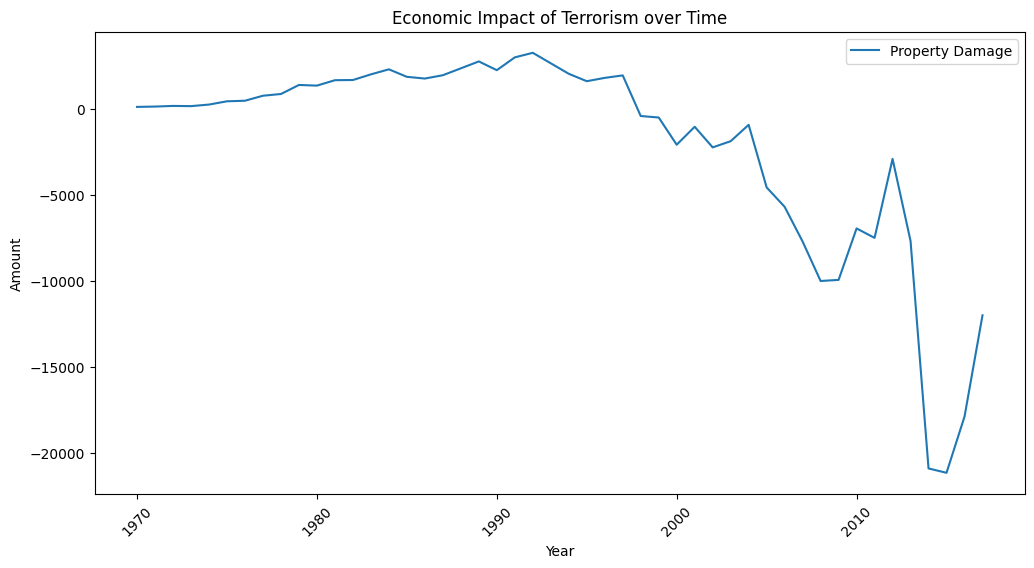

In [20]:
# Economic impact of terrorism
economic_impact = df2.groupby('year')['property'].sum()

# Plot the economic impact of terrorism over time
plt.figure(figsize=(12, 6))
economic_impact.plot(kind='line')
plt.title('Economic Impact of Terrorism over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Property Damage', 'Economic Loss'])
plt.show()

From above, we can see that properties were damaged most around 1992

<Figure size 1200x1200 with 0 Axes>

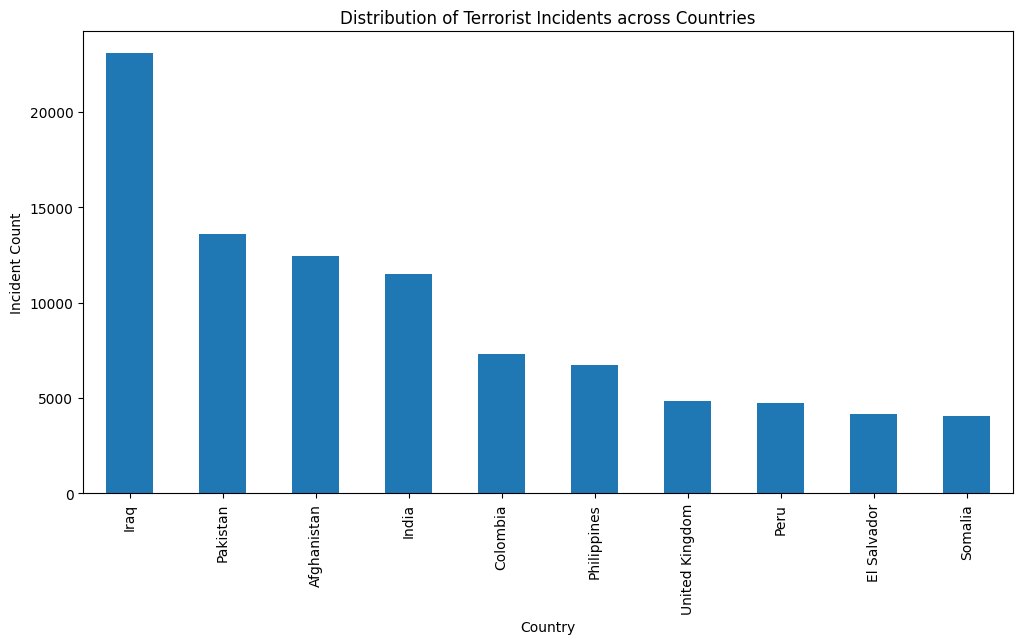

In [21]:
plt.figure(figsize=(12,12))
# Filter and group data by country and region
country_counts = df2['country'].value_counts().head(10)

# Plot the distribution of terrorist incidents across countries
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Distribution of Terrorist Incidents across Countries')
plt.xlabel('Country')
plt.ylabel('Incident Count')
plt.xticks(rotation=90)
plt.show()

It is clearly obvious that there were more terrorist attacks in Iraq than any other country. Pakistan had most after Iraq, then Afghanistan. These are the top 3 countries with most terrorist attacks out of the top 10 countries, which are; Iraq, Pakistan, Afghanistan, India, Columbia, Philipines, United Kingdom, Peru, El Savador and Somalia.

C:\Users\Dell\AppData\Local\Temp\ipykernel_2416\2627467275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.to_datetime(df2['year'], format='%Y')


<Figure size 1200x600 with 0 Axes>

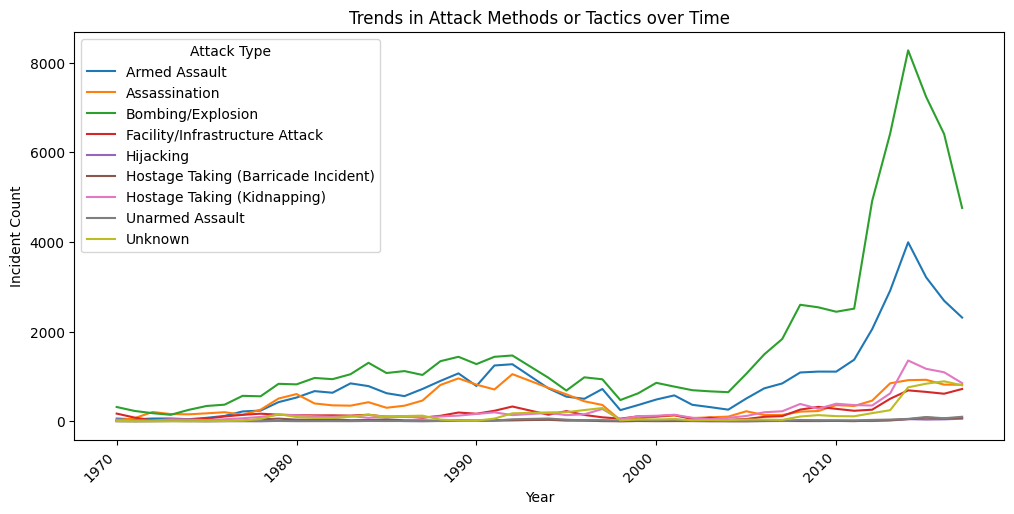

In [22]:
# Trends in attack methods or tactics over time
plt.figure(figsize=(12, 6))
df2['year'] = pd.to_datetime(df2['year'], format='%Y')
attack_trends = df2.groupby(['year', 'attack_type']).size().unstack(fill_value=0)
attack_trends.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Attack Methods or Tactics over Time')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.show()

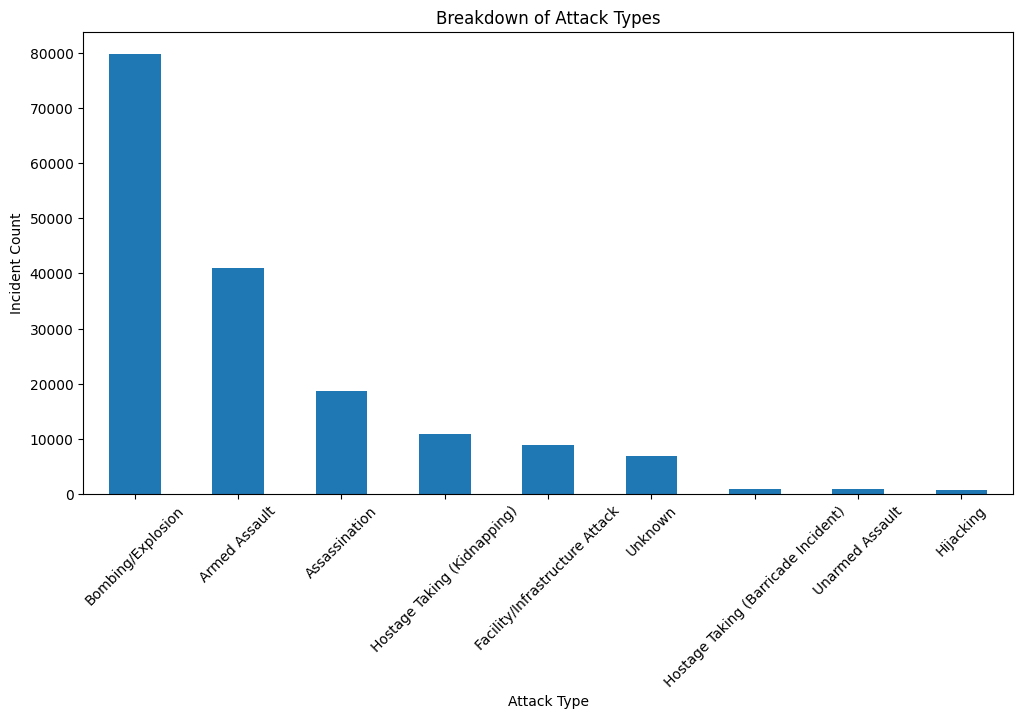

In [23]:
attack_types = df2['attack_type'].value_counts()

# Plot the breakdown of attack types
plt.figure(figsize=(12, 6))
attack_types.plot(kind='bar')
plt.title('Breakdown of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

There were more bombing and explosive attacks than any other kind of attacks. Armed assault is next, then assasination. The top ten types of attack are:
- Bombing and Explosion
- Armed Assault
- Assassination
- Hostage Taking (Kidnapping)
- Facility or Infrastructure Attack
- Unkown type of attacks 
- Barricade Incident
- Unarmed Assault
- Hijacking

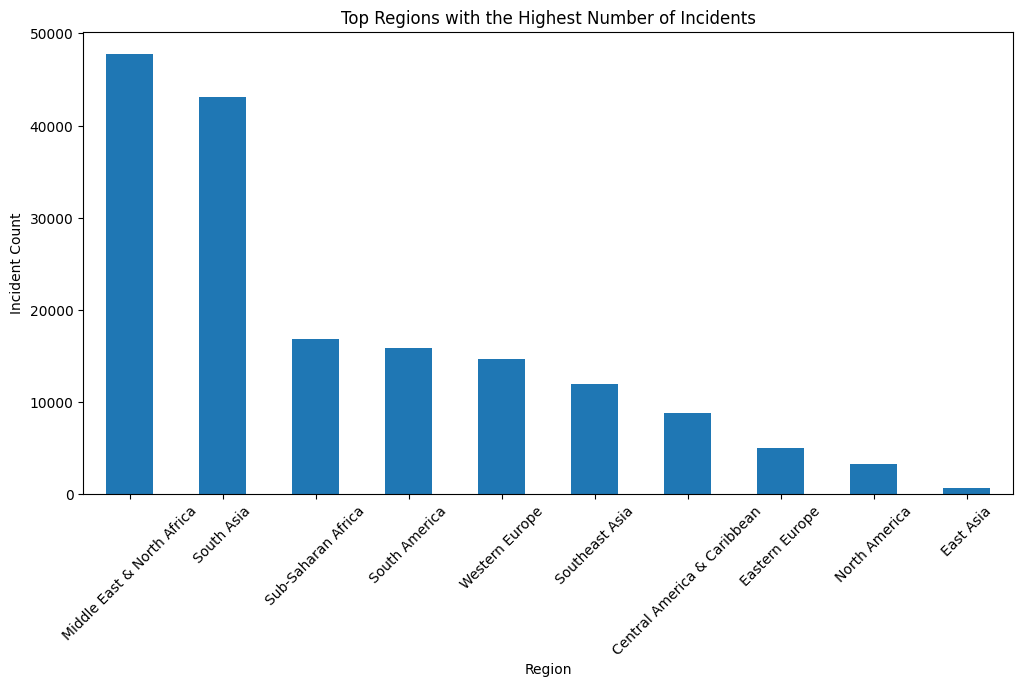

In [24]:
region_counts = df2['region'].value_counts().head(10)

plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Top Regions with the Highest Number of Incidents')
plt.xlabel('Region')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

Middle East and North Africa faced the most attacks. Second by South Asia and thirdly Sub-Saharan Africa out of the 11 regions classified. The ranking from firts to last goes like this:
1. Middle East and North Africa
2. South Asia
3. Sub-Saharan
4. South America
5. Western Europe
6. Southeast Asia
7. Central America and Caribbean
8. East Europe
9. North America
10. East Asia

,target
Private Citizens & Property,40752
Military,27322
Police,23624
Government (General),20023
Business,17994
Transportation,6021
Unknown,5074
Religious Figures/Institutions,4217
Educational Institution,4054
Utilities,3993


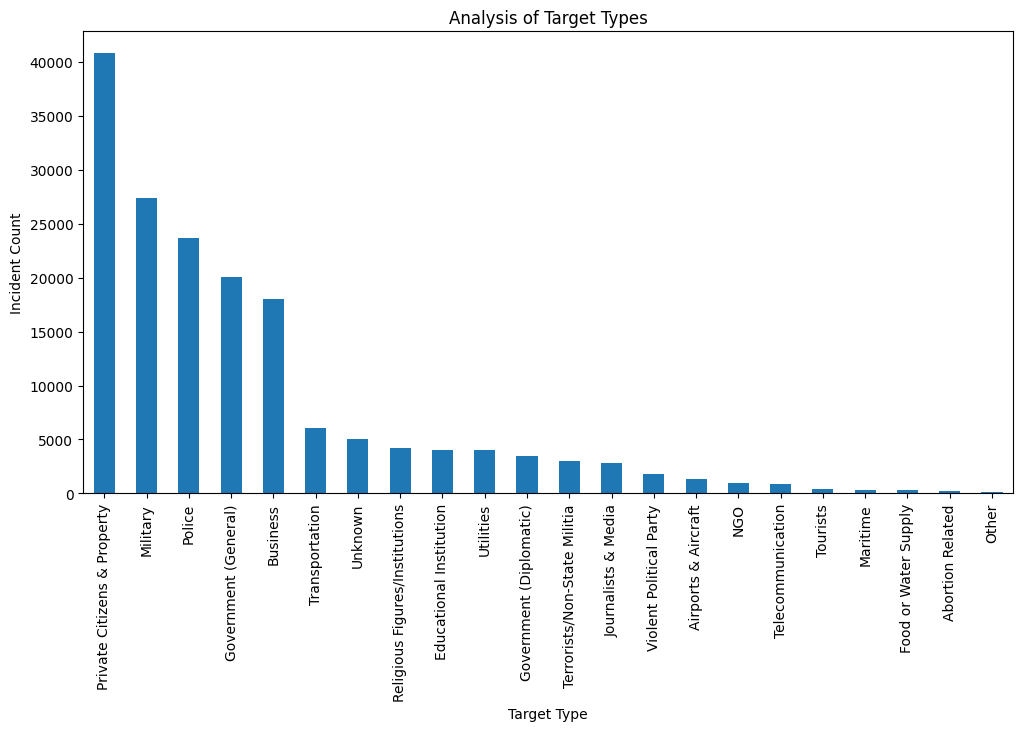

In [25]:
# Analysis of specific types of targets
target_types = df2['target'].value_counts()
display(target_types.to_frame())
# Plot the analysis of target types
plt.figure(figsize=(12, 6))
target_types.plot(kind='bar')
plt.title('Analysis of Target Types')
plt.xlabel('Target Type')
plt.ylabel('Incident Count')
plt.xticks(rotation=90)
plt.show()

Private citizens and property faced most attacks out of the 22 targets. 

<B>Top 10 Targets</b>
- Private Citizens & Property	40752
- Military	27322
- Police	23624
- Government (General)	20023
- Business	17994
- Transportation	6021
- Unknown	5074
- Religious Figures/Institutions	4217
- Educational Institution	4054
- Utilities	399

The above plot shows the 
Private Citizens & Property	40752
Military	27322
Police	23624
Government (General)	20023
Business	17994
Transportation	6021
Unknown	5074
Religious Figures/Institutions	4217
Educational Institution	4054
Utilities	3993


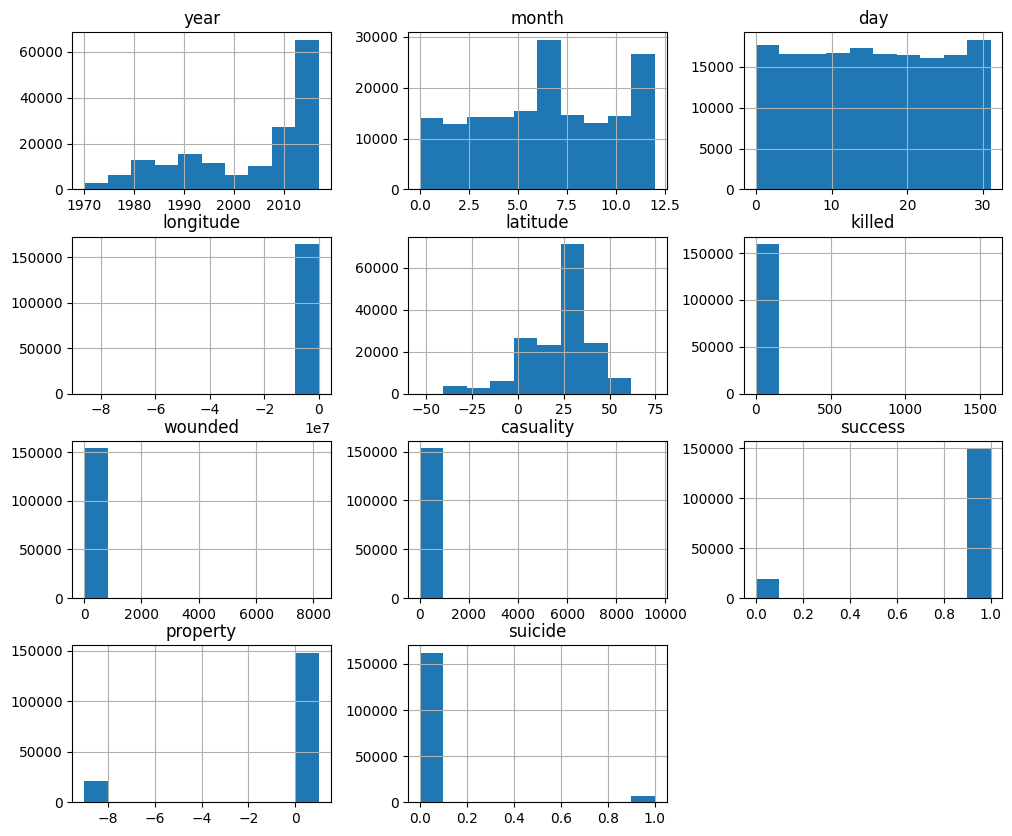

In [26]:
df2.hist(figsize=[12,10])
plt.show()

,weapon_used
Explosives,84011
Firearms,56945
Unknown,14307
Incendiary,9152
Melee,3515
Chemical,312
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Sabotage Equipment,135
Other,110
Biological,35


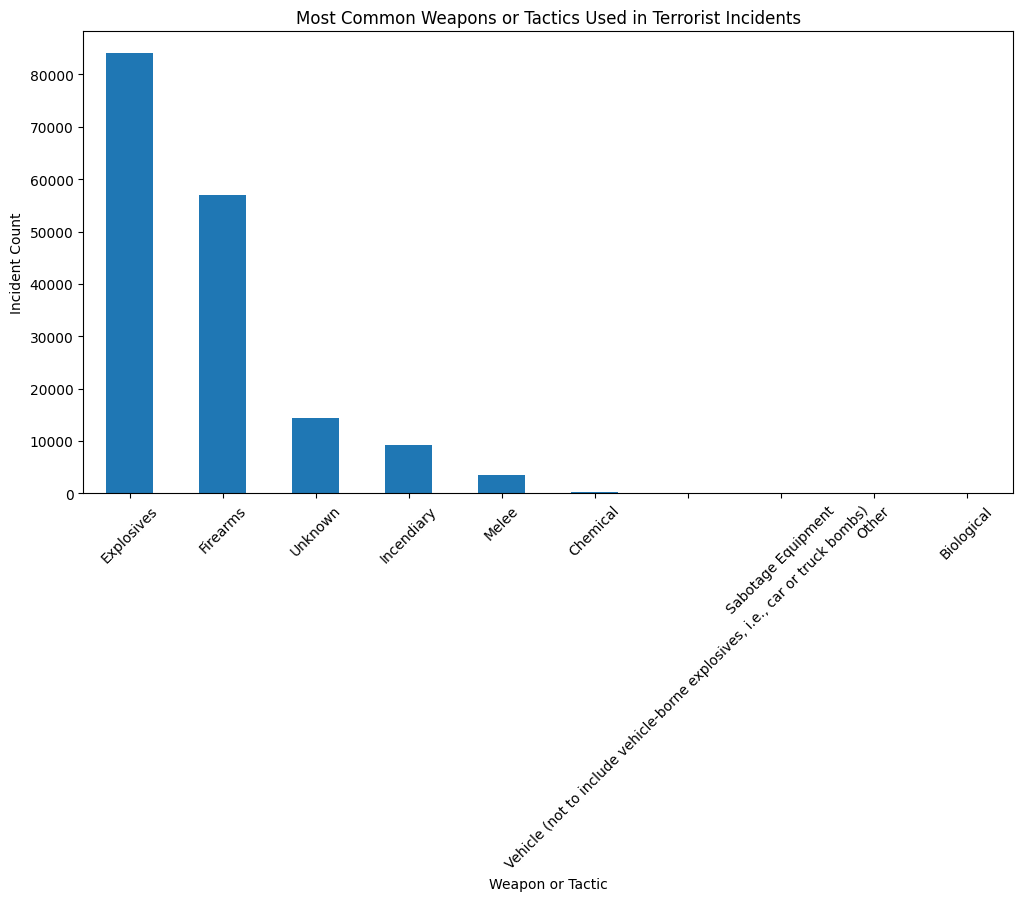

In [27]:
common_weapons = df2['weapon_used'].value_counts().head(10)
display(common_weapons.to_frame())
# Plot the most common weapons or tactics
plt.figure(figsize=(12, 6))
common_weapons.plot(kind='bar')
plt.title('Most Common Weapons or Tactics Used in Terrorist Incidents')
plt.xlabel('Weapon or Tactic')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

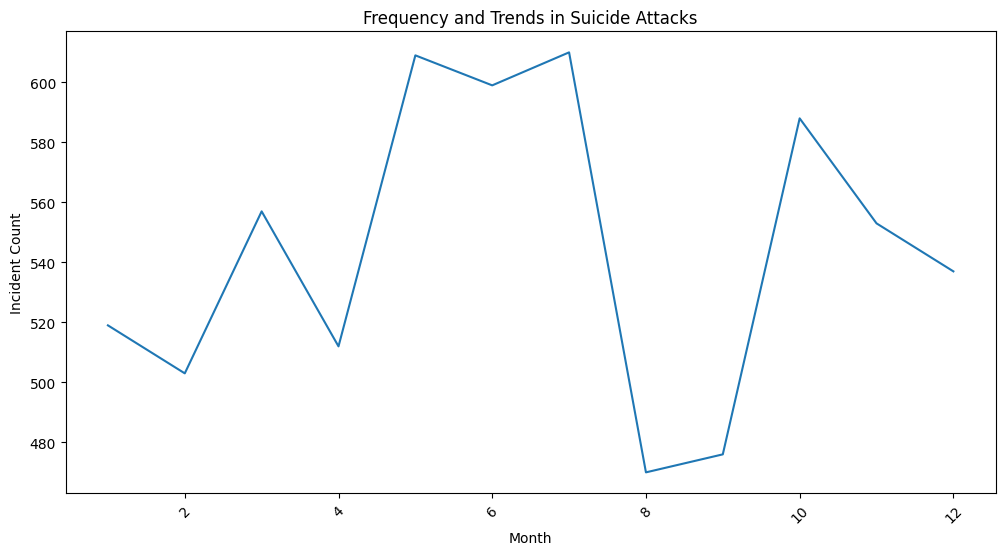

In [28]:
# Frequency and trends in suicide bombings or attacks
suicide_attacks = df2[df2['suicide'] == 1]
monthly_counts = suicide_attacks.groupby('month').size()

# Plot the frequency and trends
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line')
plt.title('Frequency and Trends in Suicide Attacks')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='year'>

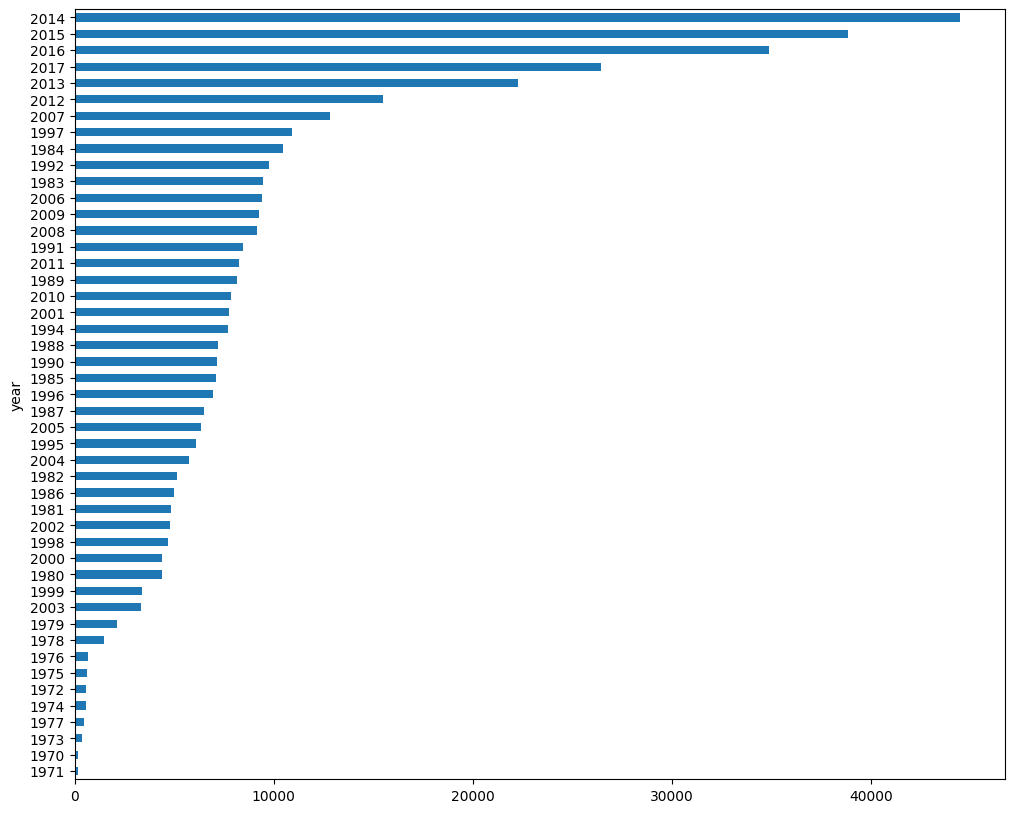

In [75]:
plt.figure(figsize=(12,10))
# df2['year'] = pd.to_datetime(df2['year'], format='%Y')
df2.groupby(['year'])['killed'].sum().sort_values().plot(kind='barh')

<Axes: xlabel='year'>

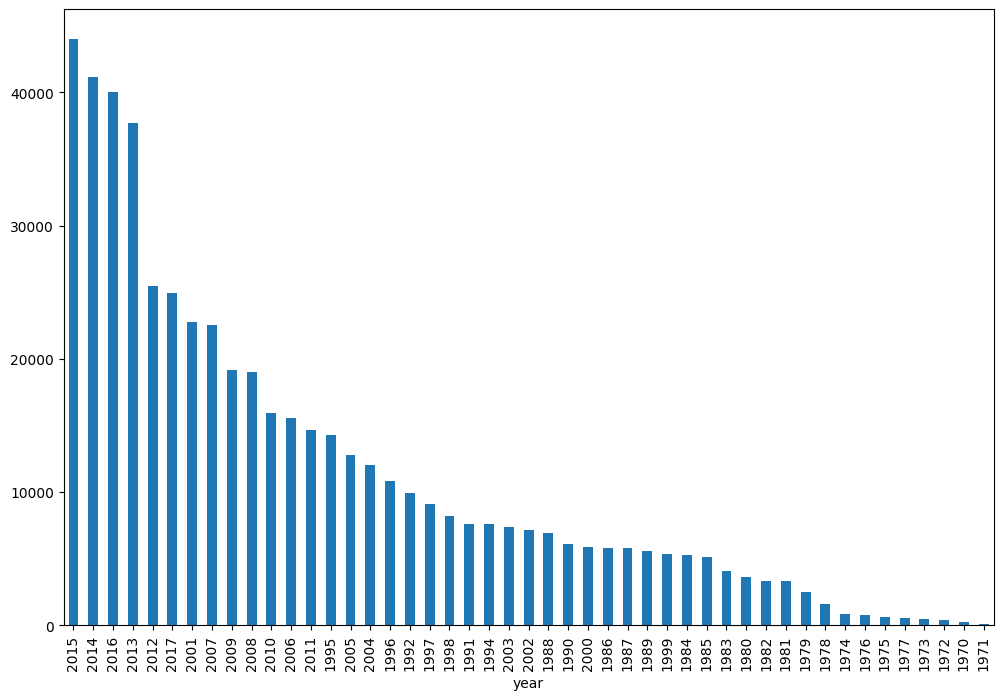

In [77]:
# df2['year'] = pd.to_datetime(df2['year'], format='%Y')
plt.figure(figsize=[12,8])
df2.groupby(['year'])['wounded'].sum().sort_values(ascending=False).plot(kind='bar')

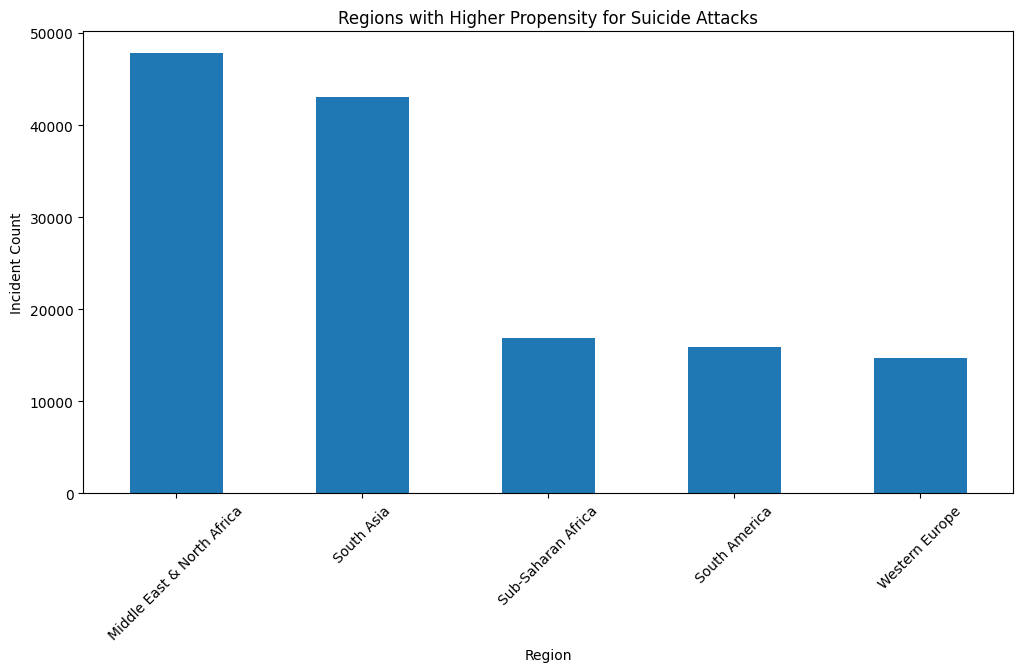

In [31]:

# Identification of regions or groups with a higher propensity for suicide attacks
region_counts = df2['region'].value_counts().head(5)

# Plot the identification of regions with higher propensity for suicide attacks
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Regions with Higher Propensity for Suicide Attacks')
plt.xlabel('Region')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
a=df2.groupby(['country'])['killed'].sum().sort_values(ascending=False).to_frame()
a.head(10)

,killed
country,
Iraq,77798.0
Afghanistan,39011.0
Pakistan,23440.0
Nigeria,22249.0
India,19116.0
Sri Lanka,15285.0
Syria,14657.0
Colombia,14049.0
Peru,12529.0


In [33]:
df2.groupby(['attack_type'])['killed'].sum().to_frame()


,killed
attack_type,
Armed Assault,158309.0
Assassination,24255.0
Bombing/Explosion,155223.0
Facility/Infrastructure Attack,3576.0
Hijacking,3717.0
Hostage Taking (Barricade Incident),4478.0
Hostage Taking (Kidnapping),23854.0
Unarmed Assault,880.0
Unknown,31840.0


<Axes: xlabel='target'>

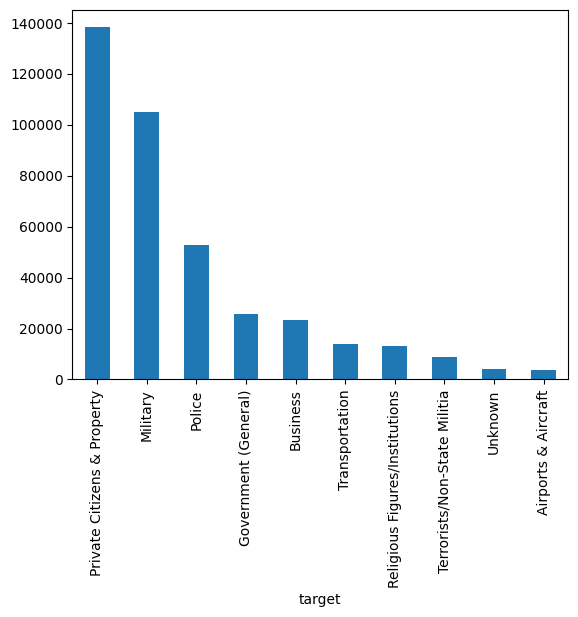

In [34]:
df2.groupby(['target'])['killed'].sum().to_frame()
df2.groupby(['target'])['killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')


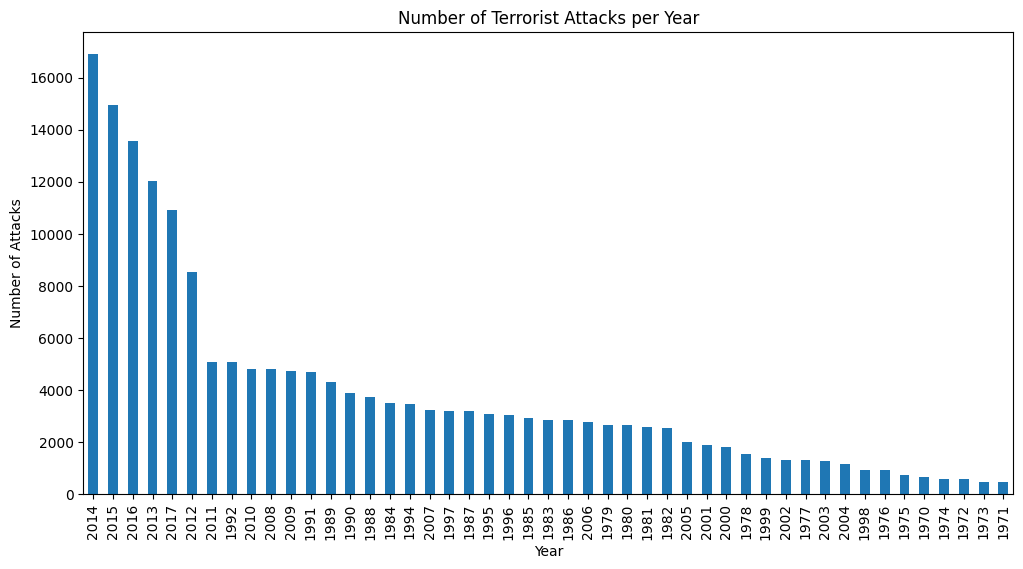

In [81]:
# 1. Year
plt.figure(figsize=[12,6])
df2['year'].value_counts().sort_index().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks per Year')
plt.show()


,severity
Moderate,53165
Minor,29177
Major,16390
Severe,765
Catastrophic,10


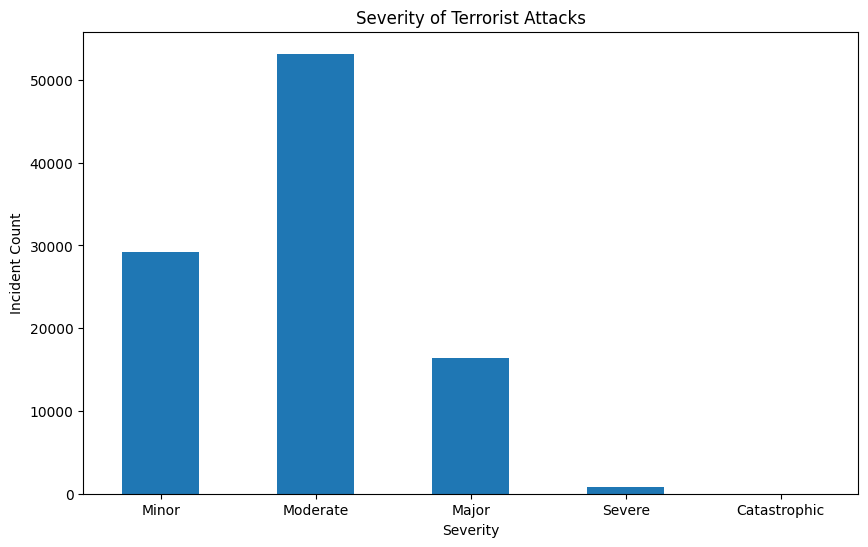

In [36]:
# Severity of attacks based on the number of casualties
df['severity'] = pd.cut(df2['casuality'], bins=[0, 1, 10, 100, 1000, float('inf')],
                        labels=['Minor', 'Moderate', 'Major', 'Severe', 'Catastrophic'])

display(df['severity'].value_counts().to_frame())

# Plot the severity of attacks
plt.figure(figsize=(10, 6))
severity_counts = df['severity'].value_counts().sort_index()
severity_counts.plot(kind='bar')
plt.title('Severity of Terrorist Attacks')
plt.xlabel('Severity')
plt.ylabel('Incident Count')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='year'>

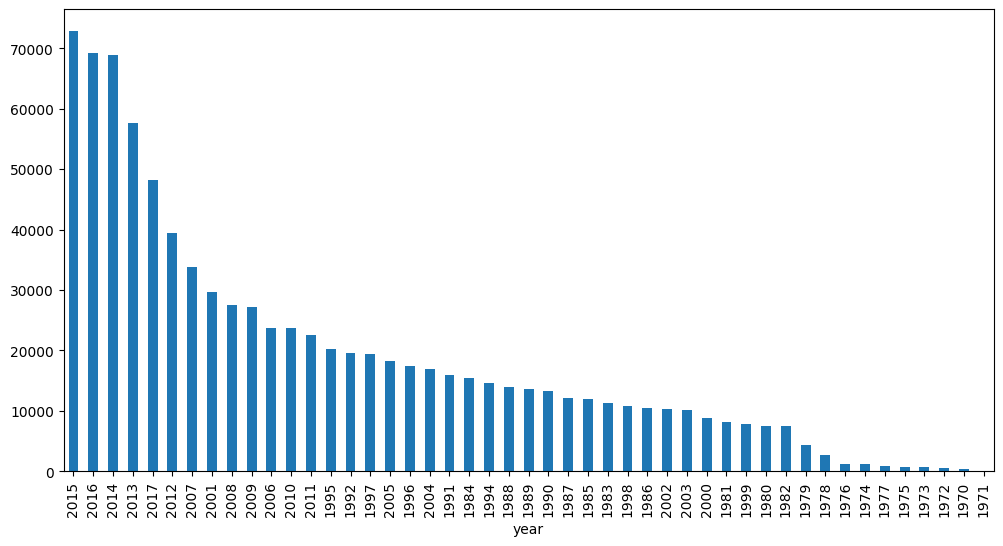

In [79]:
# 1. Year
plt.figure(figsize=[12,6])
most_dead = df2.groupby('year')['casuality'].sum().sort_values(ascending=False)
most_dead.plot(kind='bar')
# .sort_index().plot(kind='bar')
# plt.xlabel('Year')
# plt.ylabel('Number of Attacks')
# plt.title('Number of Terrorist Attacks per Year')
# plt.show()


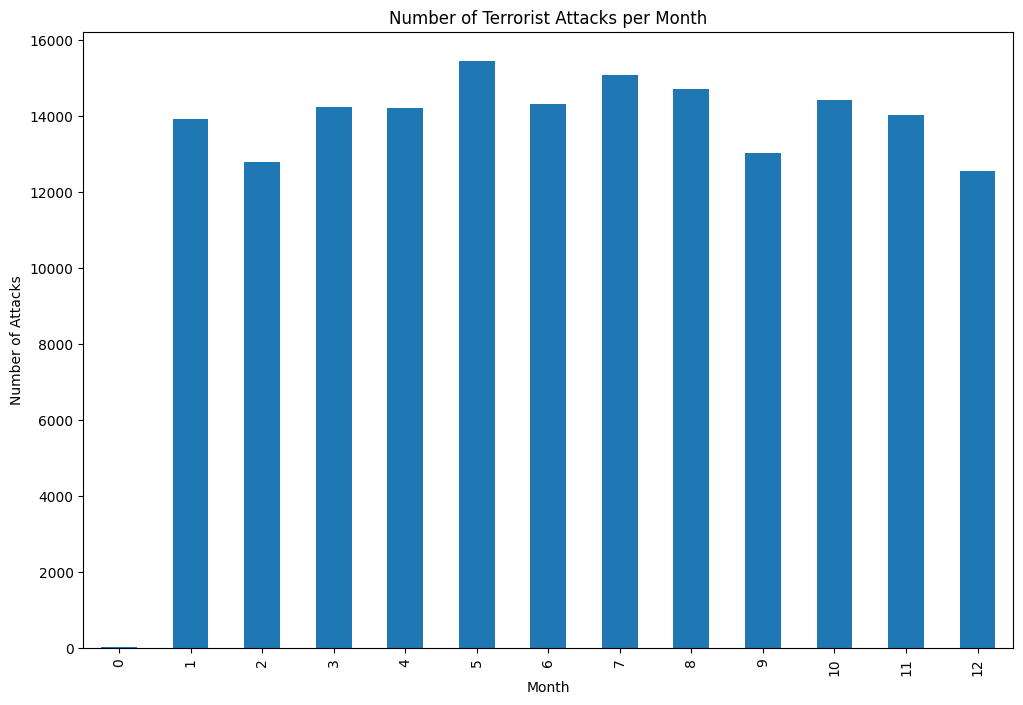

In [38]:
# 2. Month, Day
plt.figure(figsize=[12,8])
df2['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks per Month')
plt.show()



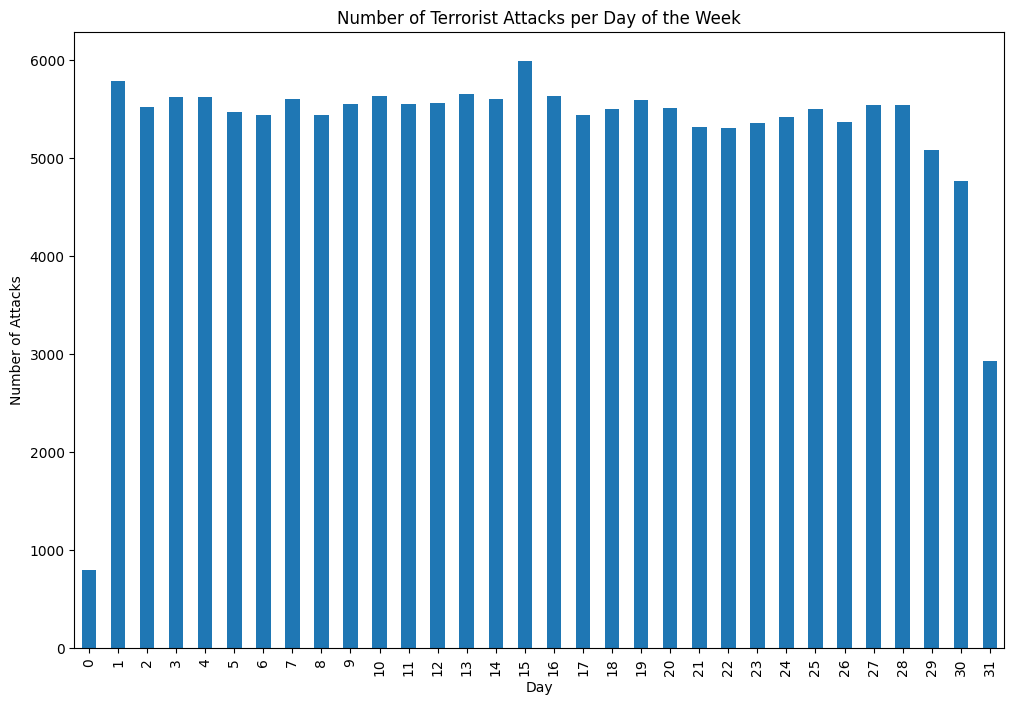

In [39]:
plt.figure(figsize=[12,8])
df2['day'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks per Day of the Week')
plt.show()



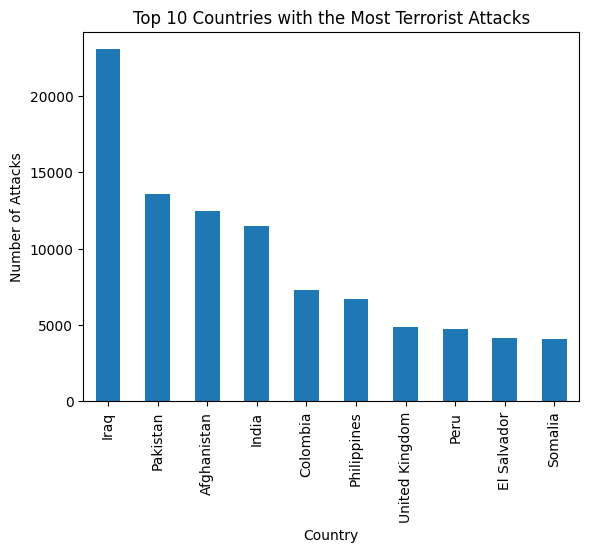

In [40]:
# 3. Country, Region, City
df2['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Countries with the Most Terrorist Attacks')
plt.show()



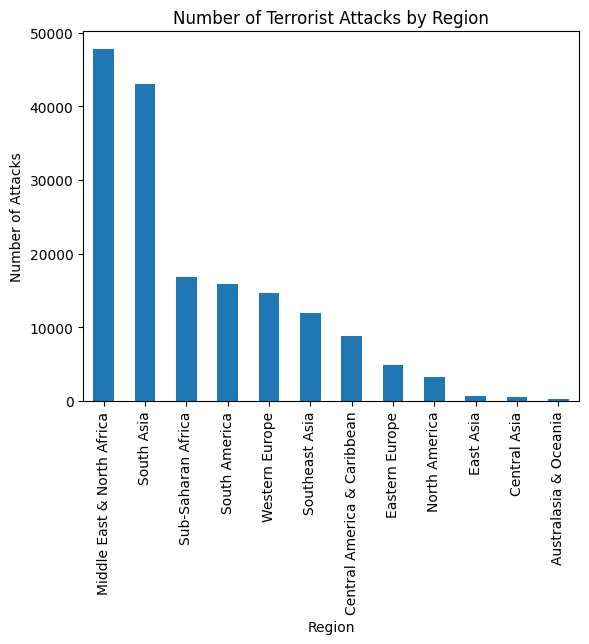

In [41]:
df2['region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks by Region')
plt.show()



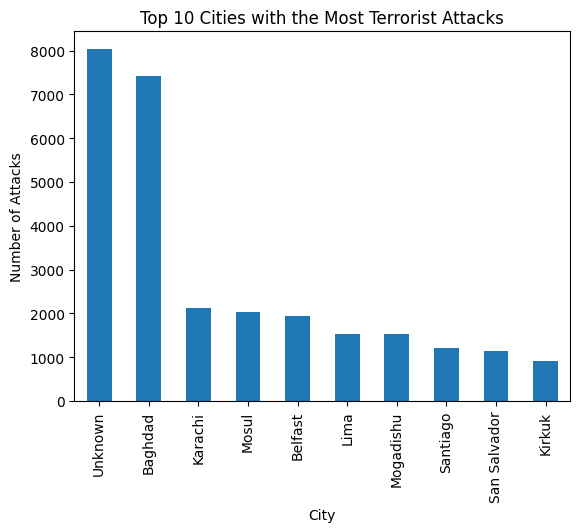

In [42]:
df2['city'].value_counts().head(10).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Cities with the Most Terrorist Attacks')
plt.show()



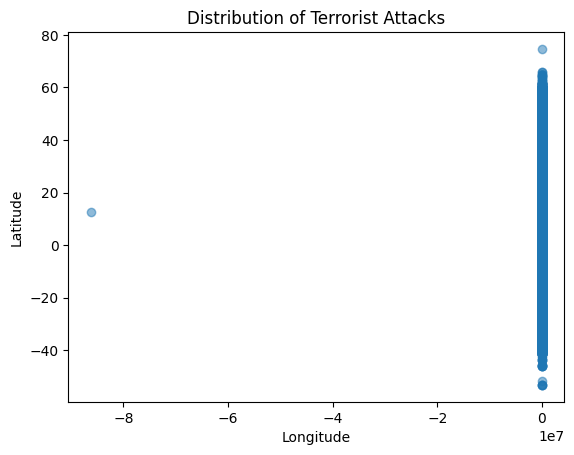

In [43]:
# 4. Longitude, Latitude
plt.scatter(df2['longitude'], df2['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Terrorist Attacks')
plt.show()



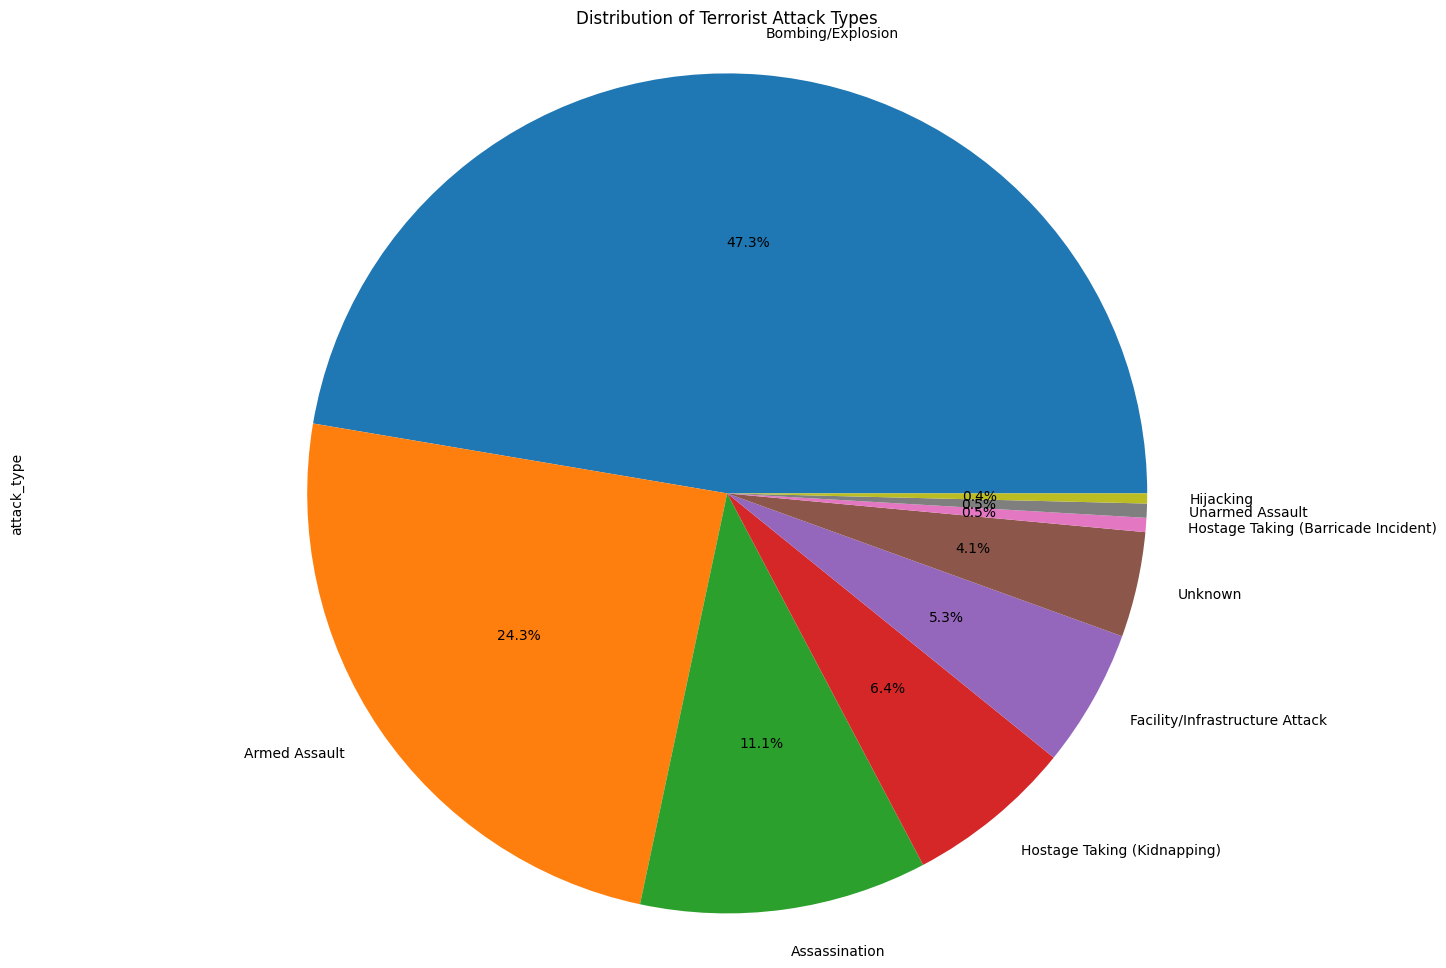

In [44]:
# 5. Attack Type
plt.figure(figsize=[18,12])
df2['attack_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Terrorist Attack Types')
plt.axis('equal')
plt.show()



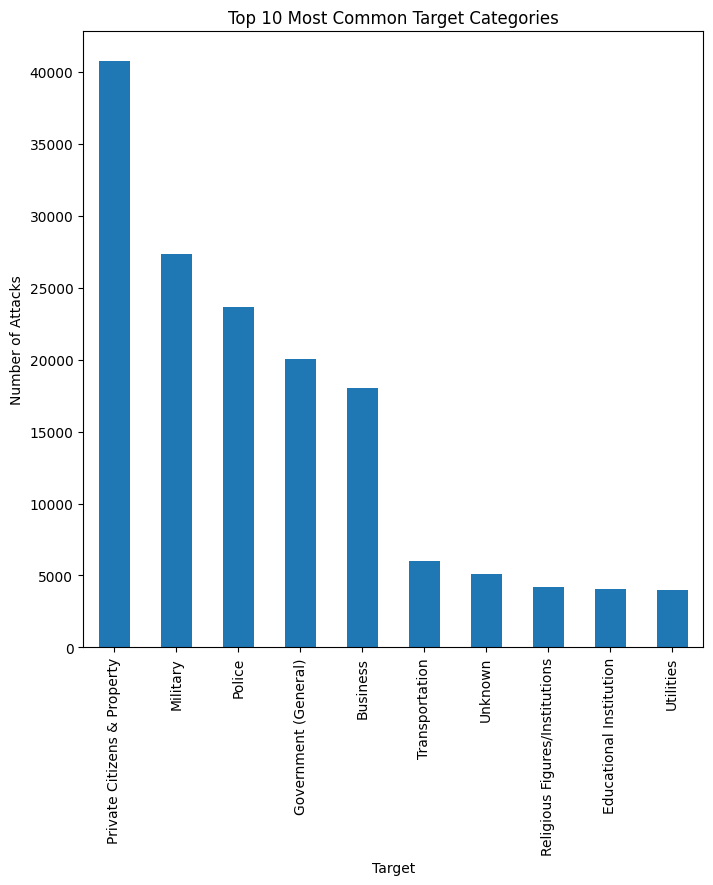

In [45]:
# 6. Target
plt.figure(figsize=[8,8])
df2['target'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Most Common Target Categories')
plt.show()



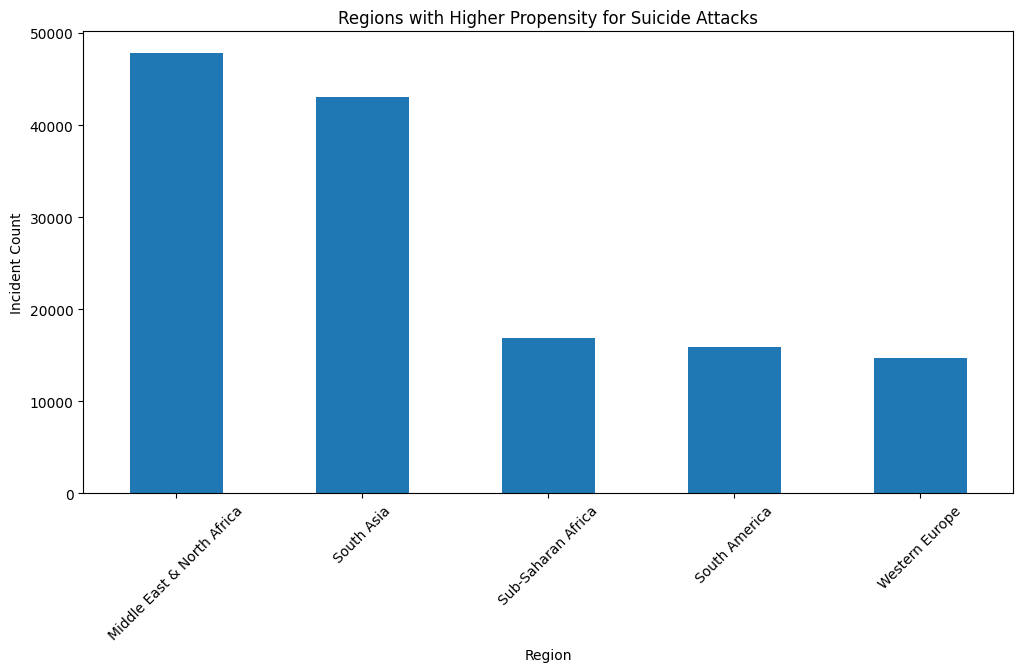

In [46]:
suicide_attacks = df2[df2['suicide'] == 1]

# Identification of regions or groups with a higher propensity for suicide attacks
region_counts = df2['region'].value_counts().head(5)

# Plot the identification of regions with higher propensity for suicide attacks
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Regions with Higher Propensity for Suicide Attacks')
plt.xlabel('Region')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

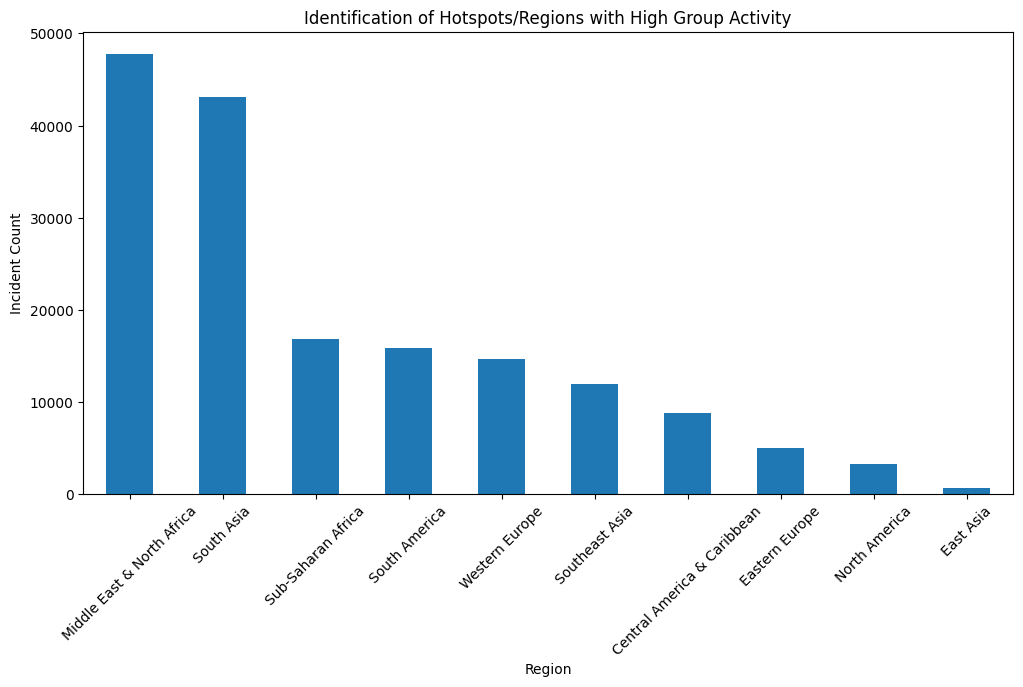

In [47]:

# Identification of hotspots or regions with high group activity
region_activity = df2['region'].value_counts().head(10)

# Plot the identification of hotspots or regions with high group activity
plt.figure(figsize=(12, 6))
region_activity.plot(kind='bar')
plt.title('Identification of Hotspots/Regions with High Group Activity')
plt.xlabel('Region')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

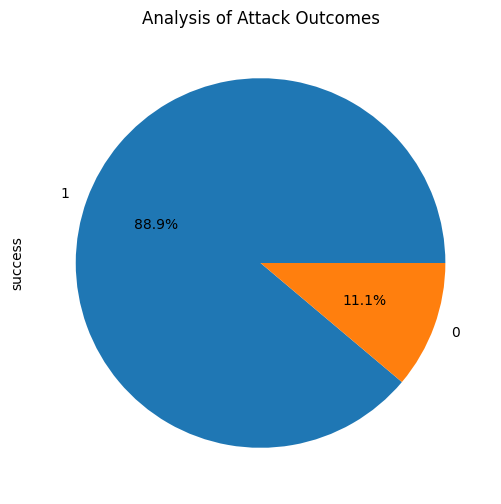

In [48]:
# Analysis of attack outcomes
attack_outcomes = df2['success'].value_counts()

# Plot the analysis of attack outcomes
plt.figure(figsize=(6, 6))
attack_outcomes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Analysis of Attack Outcomes')
plt.show()

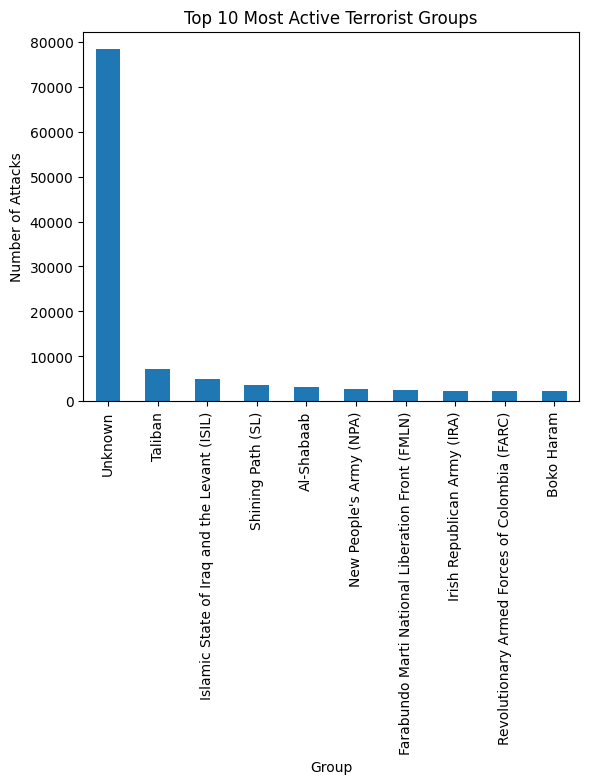

In [49]:
# 7. Group
df2['group'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Group')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Most Active Terrorist Groups')
plt.show()



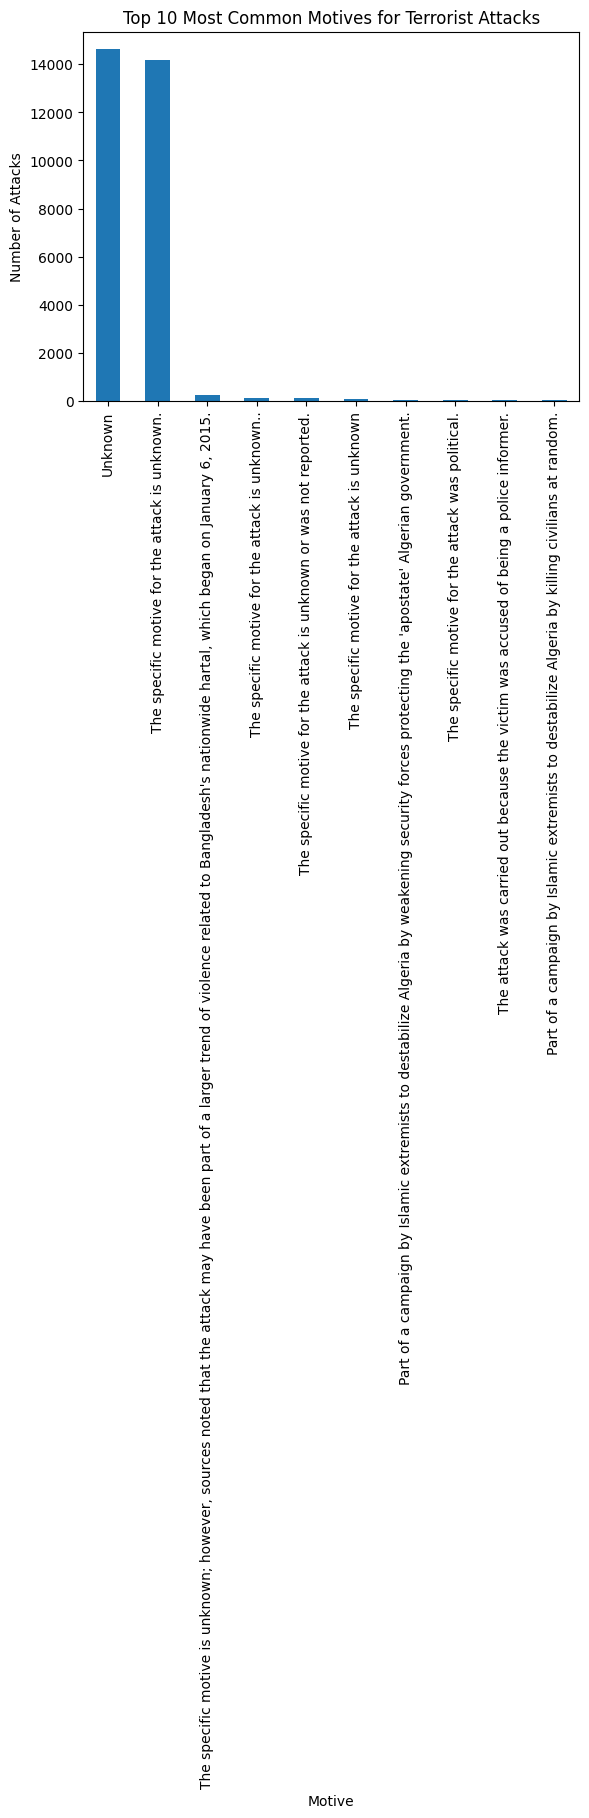

In [50]:
# 8. Motive
df2['motive'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Motive')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Most Common Motives for Terrorist Attacks')
plt.show()



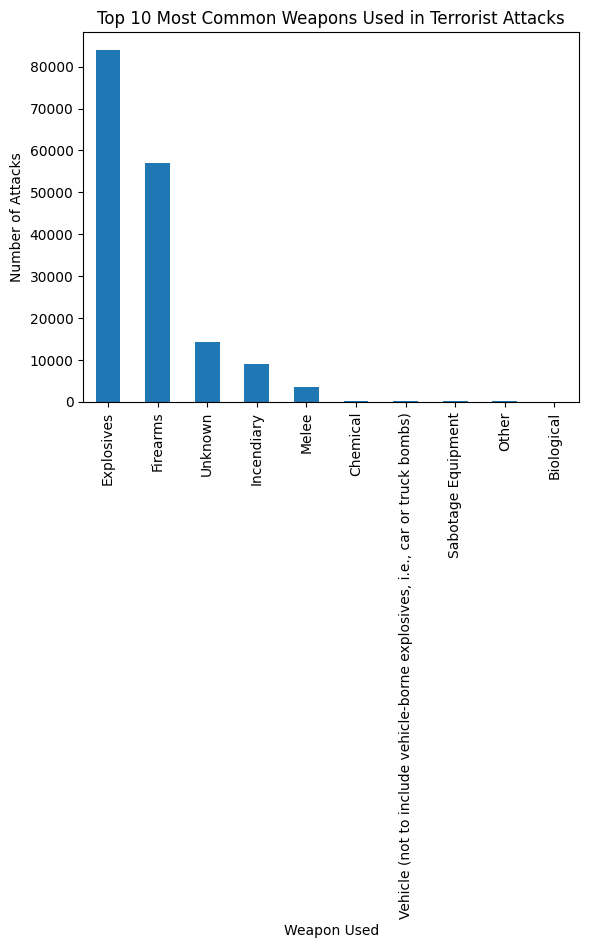

In [51]:
# 9. Weapon Used
df2['weapon_used'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Weapon Used')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Most Common Weapons Used in Terrorist Attacks')
plt.show()



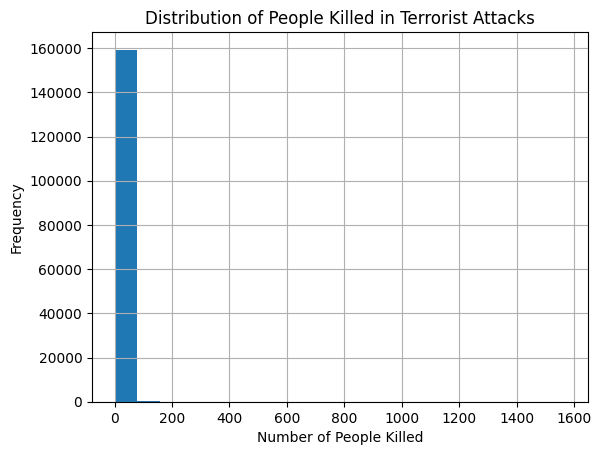

In [52]:
# 10. Killed, Wounded
df2['killed'].hist(bins=20)
plt.xlabel('Number of People Killed')
plt.ylabel('Frequency')
plt.title('Distribution of People Killed in Terrorist Attacks')
plt.show()



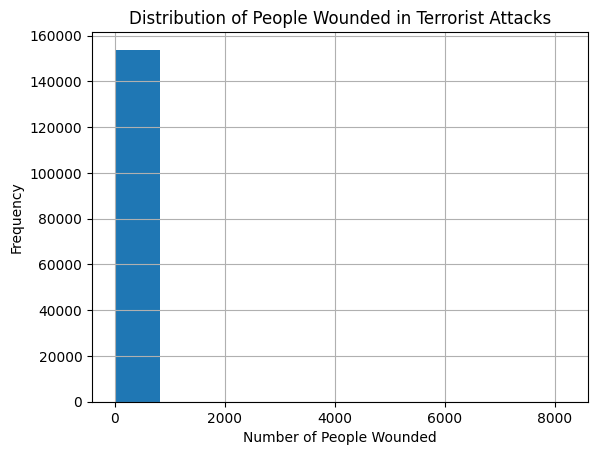

In [53]:
df2['wounded'].hist(bins=10)
plt.xlabel('Number of People Wounded')
plt.ylabel('Frequency')
plt.title('Distribution of People Wounded in Terrorist Attacks')
plt.show()



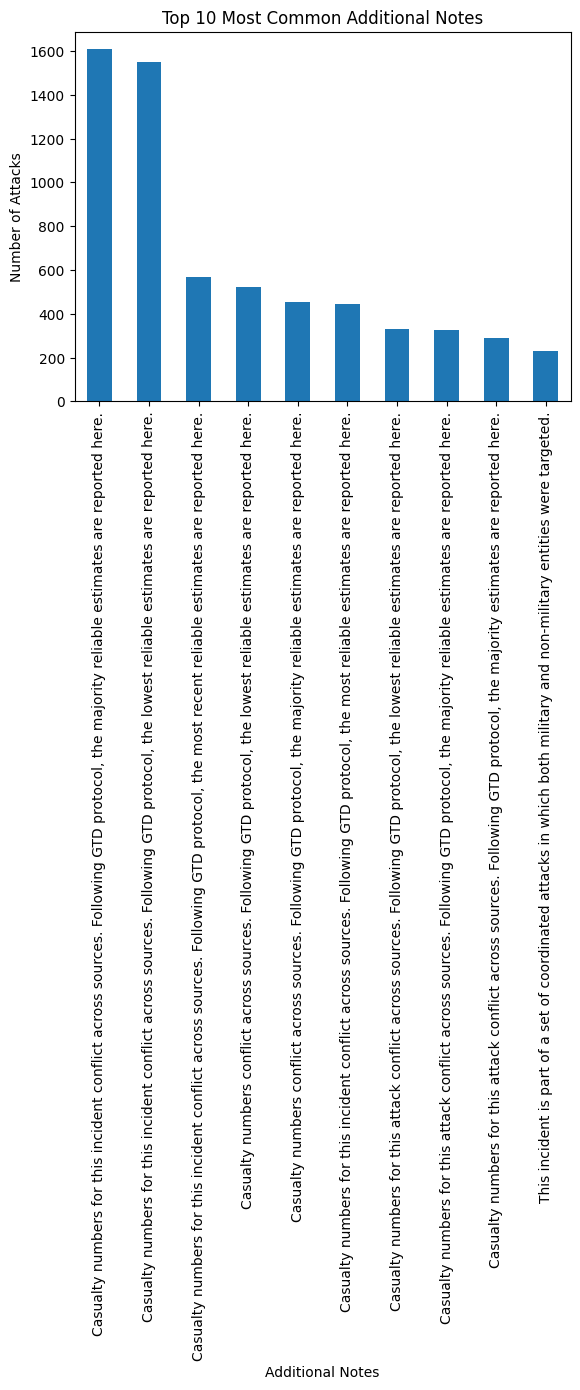

In [54]:
# 11. Addnotes
df2['addnotes'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Additional Notes')
plt.ylabel('Number of Attacks')
plt.title('Top 10 Most Common Additional Notes')
plt.show()


In [55]:
# df2_cleaned = df2.dropna(subset=['latitude', 'longitude'])

# # Impute missing values in latitude and longitude columns
# imputer = SimpleImputer(strategy='mean')
# df2_cleaned[['latitude', 'longitude']] = imputer.fit_transform(df2_cleaned[['latitude', 'longitude']])

# # Use KMeans clustering to identify regions with high frequency of attacks
# kmeans = KMeans(n_clusters=6, random_state=0)
# df2_cleaned["cluster"] = kmeans.fit_predict(df2_cleaned[["latitude", "longitude"]])

# # Plot the clusters on an interactive map
# m = folium.Map(location=[30, 0], zoom_start=2)
# colors = ["red", "green", "blue", "purple", "orange", "pink"]
# for i in range(len(df2_cleaned)):
#     folium.Marker([df2_cleaned.iloc[i]['latitude'], df2_cleaned.iloc[i]['longitude']],
#                   icon=folium.Icon(color=colors[df2_cleaned.iloc[i]['cluster']])).add_to(m)

# # Show the interactive map
# m.save('map.html')

# Drop rows with missing latitude and longitude values
# df2_cleaned = df2.dropna(subset=['latitude', 'longitude']).copy()

# # Impute missing values in latitude and longitude columns
# imputer = SimpleImputer(strategy='mean')
# df2_cleaned[['latitude', 'longitude']] = imputer.fit_transform(df2_cleaned[['latitude', 'longitude']])

# # Use KMeans clustering to identify regions with a high frequency of attacks
# kmeans = KMeans(n_clusters=6, random_state=0)
# df2_cleaned["cluster"] = kmeans.fit_predict(df2_cleaned[["latitude", "longitude"]])

# # Plot the clusters on an interactive map
# m = folium.Map(location=[30, 0], zoom_start=2)
# colors = ["red", "green", "blue", "purple", "orange", "pink"]
# for i in range(len(df2_cleaned)):
#     folium.Marker([df2_cleaned.iloc[i]['latitude'], df2_cleaned.iloc[i]['longitude']],
#                   icon=folium.Icon(color=colors[df2_cleaned.iloc[i]['cluster']])).add_to(m)

# # Show the interactive map
# m.save('map1.html')

In [56]:
# df = df.dropna(subset=['latitude', 'longitude'])


# # Use KMeans clustering to identify regions with high frequency of attacks
# kmeans = KMeans(n_clusters=6, random_state=0)
# df["cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

# # Plot the clusters on an interactive map
# m = folium.Map(location=[30,0], zoom_start=2)
# colors = ["red", "green", "blue", "purple", "orange", "pink"]
# for i in range(len(df)):
#     folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']],
#                   icon=folium.Icon(color=colors[df.iloc[i]['cluster']])).add_to(m)

# # Show the interactive map
# m.save('map.html')

#### 